# 📦 Basic EDA Setup

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset

In [75]:
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"

df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

Shape and column overview

In [76]:
print(f"Train shape: {df.shape}")
print(f"Test shape: {df_test.shape}")
df.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
print("🔢 Number of features:", df.shape[1])
print("🧪 Number of samples:", df.shape[0])
print("\n📋 Columns:\n", df.columns.to_list())

🔢 Number of features: 81
🧪 Number of samples: 1460

📋 Columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '

Count of data types

In [78]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

# 1. What are the key variables and their types?

In this section, we'll explore the dataset's columns, group them by data type, and identify features we may treat as numerical, categorical, or ordinal.


In [82]:
df.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


 Separate numerical and categorical features

In [135]:
numerical_feats = df.select_dtypes(include=['number']).columns
categorical_feats = df.select_dtypes(include=['object']).columns

print("📊 Numerical features:", len(numerical_feats))
print("🔤 Categorical features:", len(categorical_feats))

📊 Numerical features: 38
🔤 Categorical features: 43


 Summary Statistics of Numerical Features

In [118]:
df[numerical_feats].describe().T.sort_values("std", ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.20,79442.50,34900.0,129975.00,163000.0,214000.00,755000.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
GrLivArea,1460.0,1515.46,525.48,334.0,1129.50,1464.0,1776.75,5642.0
MiscVal,1460.0,43.49,496.12,0.0,0.00,0.0,0.00,15500.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.24,441.87,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.43,438.71,0.0,795.75,991.5,1298.25,6110.0
2ndFlrSF,1460.0,346.99,436.53,0.0,0.00,0.0,728.00,2065.0
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
1stFlrSF,1460.0,1162.63,386.59,334.0,882.00,1087.0,1391.25,4692.0


 Check values of all categorical features

In [ ]:
for col in categorical_feats:
    print(f"\n🔍 {col}: {df[col].unique()}")



🔍 MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

🔍 Street: ['Pave' 'Grvl']

🔍 Alley: [nan 'Grvl' 'Pave']

🔍 LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

🔍 LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

🔍 Utilities: ['AllPub' 'NoSeWa']

🔍 LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

🔍 LandSlope: ['Gtl' 'Mod' 'Sev']

🔍 Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

🔍 Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

🔍 Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

🔍 BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

🔍 HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

🔍 RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

🔍 RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' '

In [85]:
ordinal_candidates = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond', 'PoolQC'
]

for feature in ordinal_candidates:
    if feature in df.columns:
        print(f"{feature}: {df[feature].unique()}")

ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC: [nan 'Ex' 'Fa' 'Gd']


🧠 Notes: 

• MSSubClass, MoSold might be stored as numerical but represent categories → convert to object.

• Ordinal variables (e.g., ExterQual) will need custom mappings.

• Some numerical features like GarageCars are discrete, not continuous.

# 2. Which features have missing values?

Handling missing values is critical for clean modeling. We'll list all features with missing data and visualize patterns.


 Check missing values sorted

In [88]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("🕳️ Features with missing values:")
missing

🕳️ Features with missing values:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

 Check total and percentage of missing values

In [107]:
missing_percent = (missing / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percent', ascending=False)

styled_missing_data = missing_data.style.background_gradient(cmap='Reds')
styled_missing_data

,Missing Values,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


**High-Missingness Features**
- Features like `PoolQC`, `Alley`, `Fence` have >80% missing values.
- These likely represent absence of features (e.g., no pool, no alley access).
- We'll either drop or encode them as 'None' during preprocessing.


**Moderately Missing**
- `LotFrontage` has ~18% missing values.
- It will be imputed using the median LotFrontage grouped by `Neighborhood`.


**Low Missingness**
- Features like `GarageType`, `MasVnrType` have low missing rates.
- We'll impute categorical values with `'None'` and numeric values with the median.


Missing Value Overview

We inspect missing values across features. Features with high missingness (e.g., >40%) may be dropped or require special handling. Others will be imputed based on feature type and domain relevance.

# 3. Are there any strong correlations with SalePrice?

We explore which features are strongly correlated with our target variable (`SalePrice`), both positively and negatively.


In [113]:
correlation_matrix = df[numerical_feats].corr()
correlations_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

Display top 10 positively correlated features

In [114]:
print("Top Positive Correlations with SalePrice:\n")
print(correlations_with_target.head(10))

Top Positive Correlations with SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


Display top 5 negatively correlated features

In [115]:
print("\nTop Negative Correlations with SalePrice:\n")
print(correlations_with_target.tail(5))


Top Negative Correlations with SalePrice:

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Visualize correlations as a heatmap

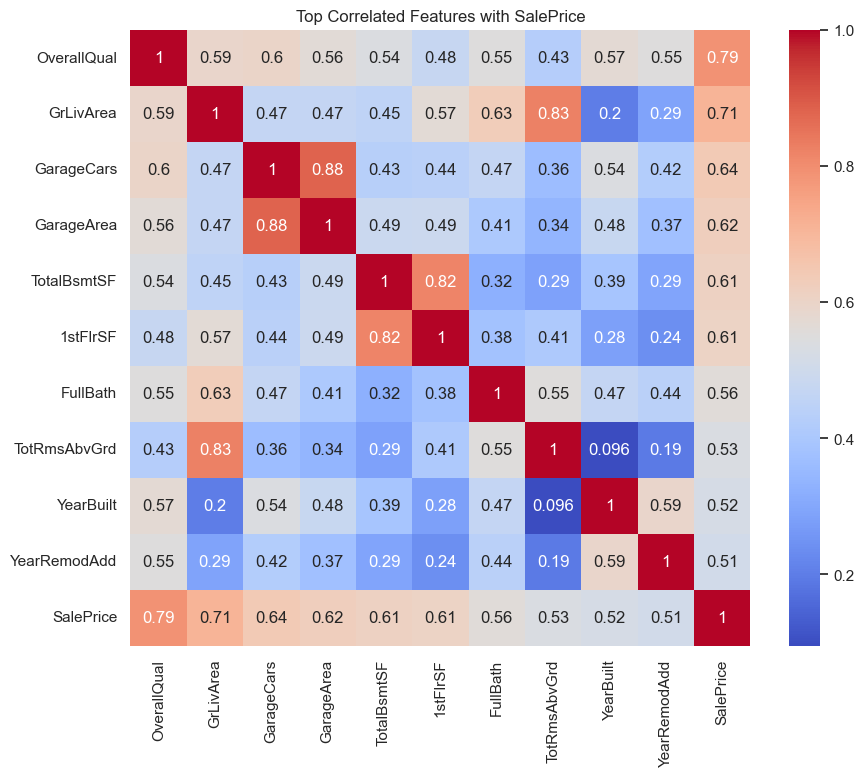

In [121]:
plt.figure(figsize=(10, 8))
top_corr = correlations_with_target[1:11].index  # skip SalePrice itself
sns.heatmap(df[top_corr.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()

🔎 We observe that:
- `OverallQual` has the highest correlation with `SalePrice`, indicating better overall quality = higher price.
- `GrLivArea` and `GarageCars` are also strongly predictive.
- Surprisingly, some features like `YearBuilt` also show notable positive correlation.


# 4. How is the target (SalePrice) distributed?

Regression models assume a normally distributed target. We'll visualize the distribution and assess skewness.


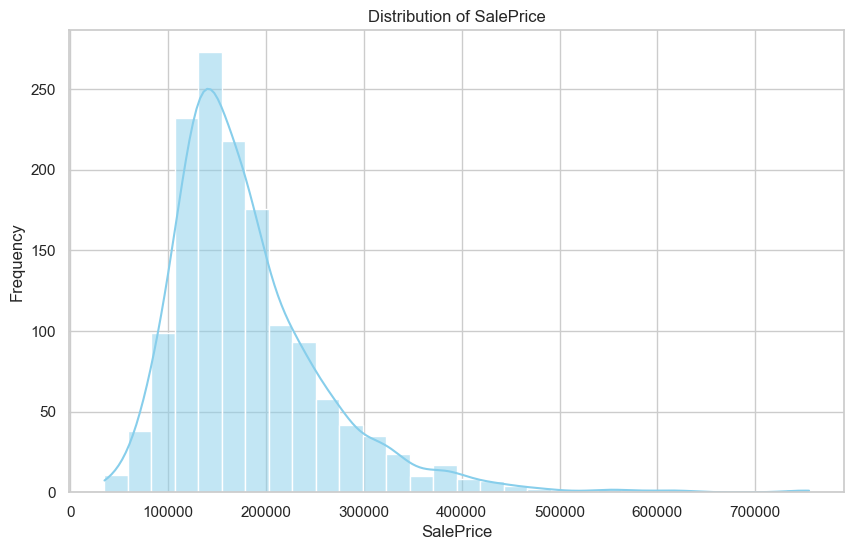

Skewness: 1.88
Kurtosis: 6.54


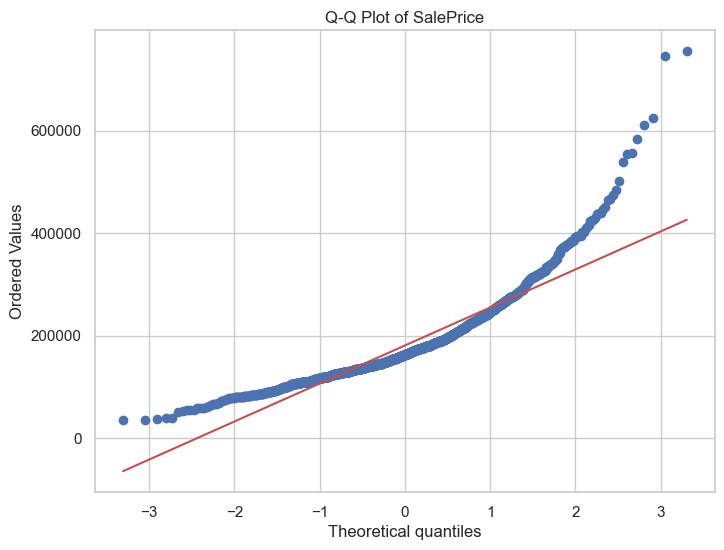

In [133]:
from scipy.stats import  probplot

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Skewness and kurtosis
print(f"Skewness: {df['SalePrice'].skew():.2f}")
print(f"Kurtosis: {df['SalePrice'].kurtosis():.2f}")

# Probability plot (Q-Q Plot)
plt.figure(figsize=(8, 6))
probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice')
plt.show()


The distribution of `SalePrice` is right-skewed (Skewness ≈ 1.88).  
This violates the normality assumption of many models.  
To address this, we will consider applying a log transformation later during preprocessing.


## 5. Which features are skewed, need transformation, or contain outliers?

We identify skewed features, transform them if necessary, and detect potential outliers using visual and statistical techniques.


In [140]:
# Select only numerical features
numeric_feats = df.select_dtypes(include=[np.number])

# Calculate skewness
skewed_feats = numeric_feats.apply(lambda x: x.skew()).sort_values(ascending=False)

# Display features with skewness > 0.75 (threshold can vary)
high_skew = skewed_feats[abs(skewed_feats) > 0.75]
print(f"Skewed features:\n{high_skew}")

Skewed features:
MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64


Visualize top 3 most skewed features before transformation

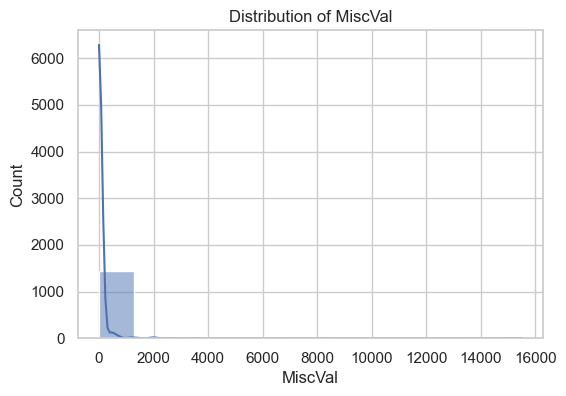

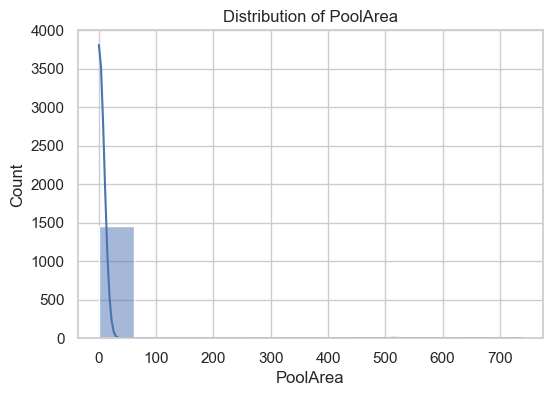

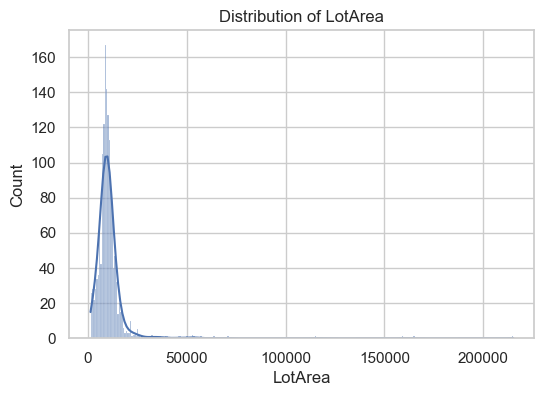

In [142]:
top_skewed = high_skew.index[:3]

for feature in top_skewed:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

Apply log1p to correct skewness

In [145]:
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

Recalculate skew

In [ ]:
new_skew = df[high_skew.index].apply(lambda x: x.skew())
print("Skew after transformation:\n", new_skew)


Skew after transformation:
 MiscVal           5.025754
PoolArea         14.353386
LotArea          -0.738508
3SsnPorch         7.628146
LowQualFinSF      7.315232
KitchenAbvGr      1.616548
BsmtFinSF2        2.434962
ScreenPorch       3.116633
BsmtHalfBath      3.878062
EnclosedPorch     2.055051
MasVnrArea        0.394267
OpenPorchSF      -0.184041
LotFrontage      -1.243283
SalePrice        -0.046644
BsmtFinSF1       -0.752061
WoodDeckSF        0.092076
TotalBsmtSF      -5.979469
MSSubClass        0.036248
1stFlrSF         -0.088855
GrLivArea        -0.190163
BsmtUnfSF        -2.978028
2ndFlrSF          0.275194
dtype: float64


Visualizing outliers

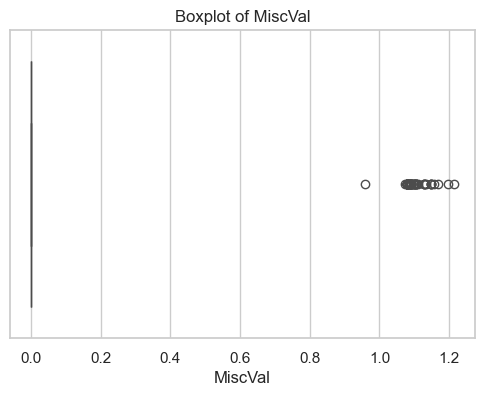

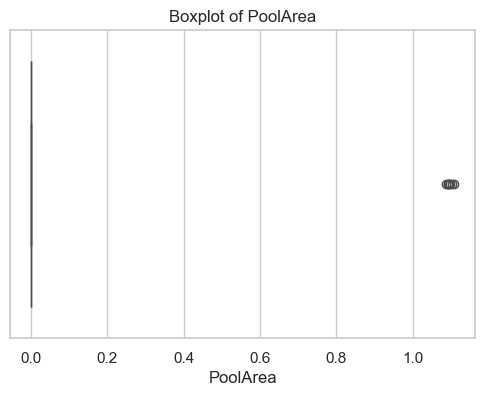

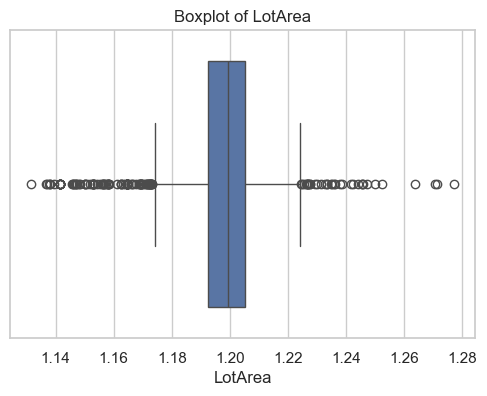

In [ ]:
for feature in top_skewed:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [148]:
from scipy.stats import boxcox

# Must be strictly positive
for feature in high_skew.index:
    if (df[feature] > 0).all():
        df[feature], _ = boxcox(df[feature])


## 6. Which categorical features have predictive power?

We analyze high-impact categorical variables and how their levels relate to house prices.


In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.copy()

for col in categorical_feats:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

corrs = df_encoded[categorical_feats].apply(lambda x: x.corr(df_encoded['SalePrice']))
print(corrs.sort_values(ascending=False))


Foundation       0.411714
CentralAir       0.358408
PavedDrive       0.309273
Electrical       0.297539
SaleCondition    0.250413
HouseStyle       0.216015
Neighborhood     0.200276
RoofStyle        0.183935
Alley            0.157746
ExterCond        0.150375
Fence            0.138378
Functional       0.131870
Exterior2nd      0.126396
Exterior1st      0.122468
Condition1       0.116929
RoofMatl         0.105751
MiscFeature      0.079606
Street           0.058532
LandSlope        0.036919
LandContour      0.033604
BsmtCond         0.022894
GarageCond       0.019933
GarageQual       0.003340
Condition2       0.000754
Utilities       -0.012365
BsmtFinType2    -0.013109
SaleType        -0.035361
BldgType        -0.071126
LotConfig       -0.073183
PoolQC          -0.083015
BsmtFinType1    -0.141964
Heating         -0.142631
MSZoning        -0.188172
LotShape        -0.278081
BsmtExposure    -0.301944
MasVnrType      -0.309210
HeatingQC       -0.425150
FireplaceQu     -0.464078
GarageType  

In [160]:
from sklearn.feature_selection import mutual_info_regression

# 3. Calculate mutual information scores
mi_scores = mutual_info_regression(df_encoded[categorical_feats], df_encoded['SalePrice'])

# 4. Create DataFrame of scores
mi_df = pd.DataFrame({
    'Feature': categorical_feats,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

# 5. Display top important categorical features
important_cats = mi_df[mi_df['MI_Score'] > 0]['Feature'].tolist()

mi_df

,Feature,MI_Score
8,Neighborhood,0.505099
18,ExterQual,0.332445
30,KitchenQual,0.327411
21,BsmtQual,0.326754
34,GarageFinish,0.264025
33,GarageType,0.205535
32,FireplaceQu,0.199293
20,Foundation,0.193049
16,Exterior2nd,0.167354
27,HeatingQC,0.167245


In [161]:
print("Top important categorical features:")
print(important_cats)

Top important categorical features:
['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'GarageType', 'FireplaceQu', 'Foundation', 'Exterior2nd', 'HeatingQC', 'BsmtFinType1', 'Exterior1st', 'MSZoning', 'MasVnrType', 'HouseStyle', 'LotShape', 'SaleCondition', 'BsmtExposure', 'GarageCond', 'SaleType', 'GarageQual', 'CentralAir', 'Electrical', 'PavedDrive', 'BldgType', 'BsmtCond', 'Fence', 'Alley', 'BsmtFinType2', 'LotConfig', 'LandContour', 'Condition1', 'ExterCond', 'Heating', 'Functional', 'RoofStyle', 'RoofMatl', 'Utilities', 'PoolQC', 'LandSlope', 'MiscFeature']


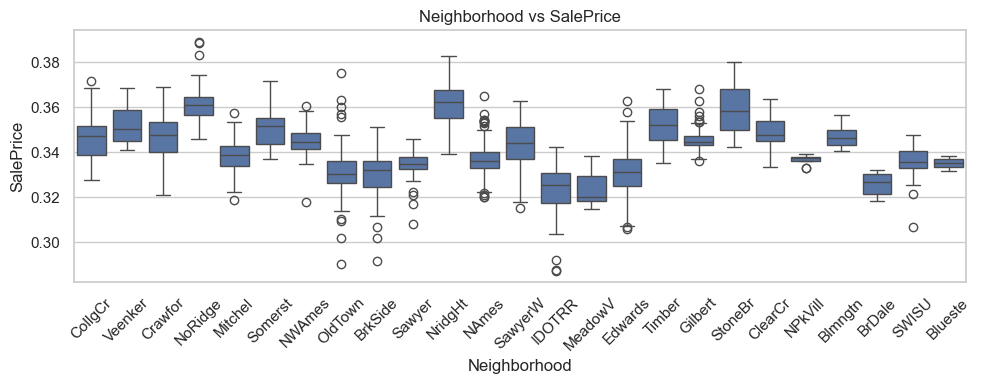

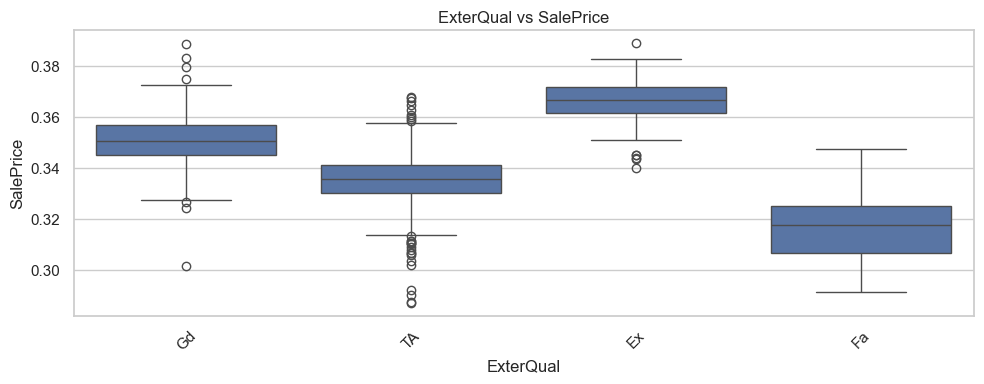

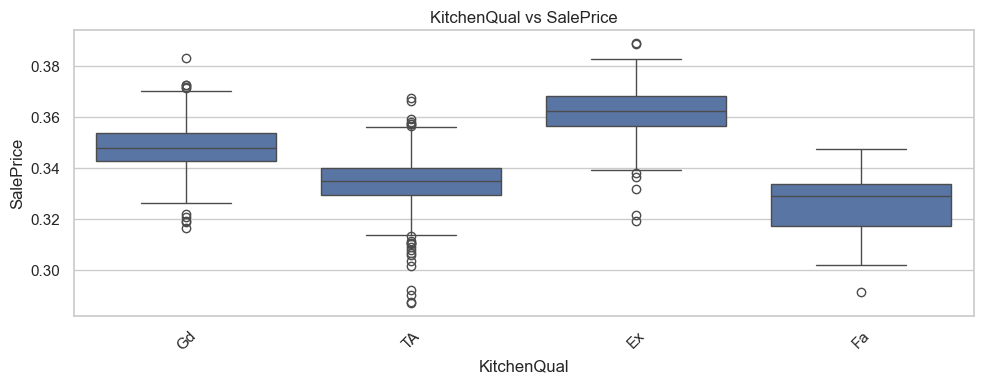

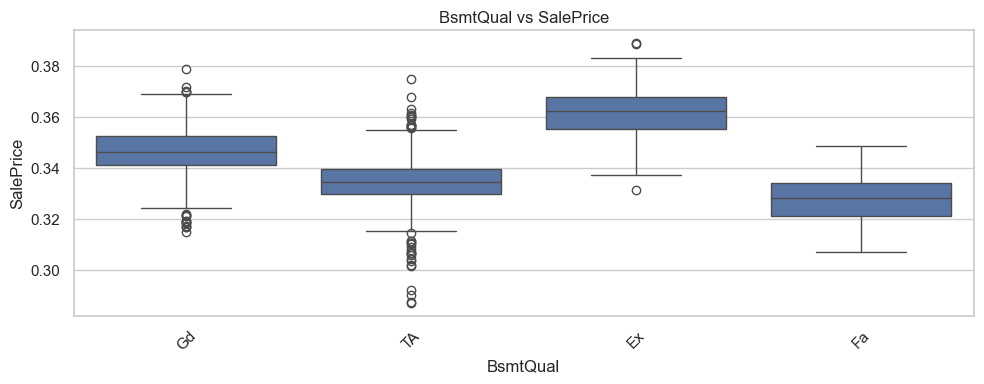

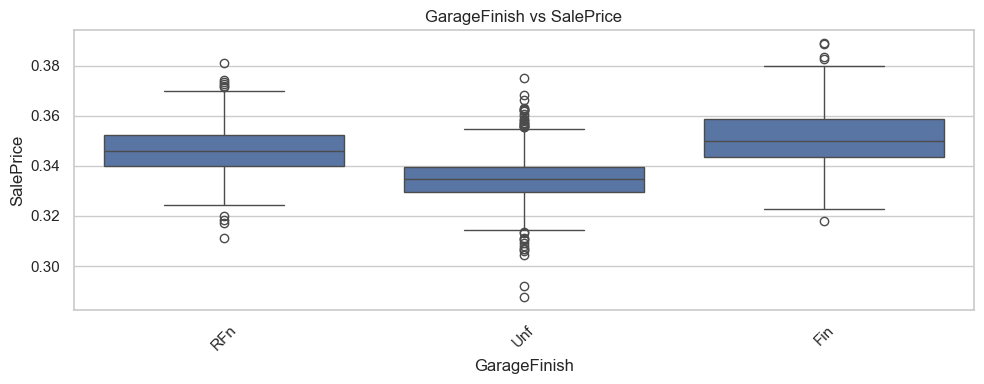

In [163]:
for col in important_cats[:5]:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs SalePrice")
    plt.tight_layout()
    plt.show()

High-impact categorical features:

	• Neighborhood

	• ExterQual / KitchenQual / BsmtQual

	• GarageType

These features should be retained and encoded smartly (ordinal encoding or one-hot).

## 7. What are the strongest numerical predictors of price?

We identify the most influential numerical features that impact the `SalePrice` using correlation, plots, and domain logic.


In [165]:
correlation_matrix = df[numerical_feats].corr()
top_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Show top 10 correlations
top_corr_features.head(10)

SalePrice       1.000000
OverallQual     0.815283
GrLivArea       0.729465
GarageCars      0.680241
GarageArea      0.649774
1stFlrSF        0.607141
FullBath        0.594076
YearBuilt       0.587833
YearRemodAdd    0.566712
GarageYrBlt     0.542476
Name: SalePrice, dtype: float64

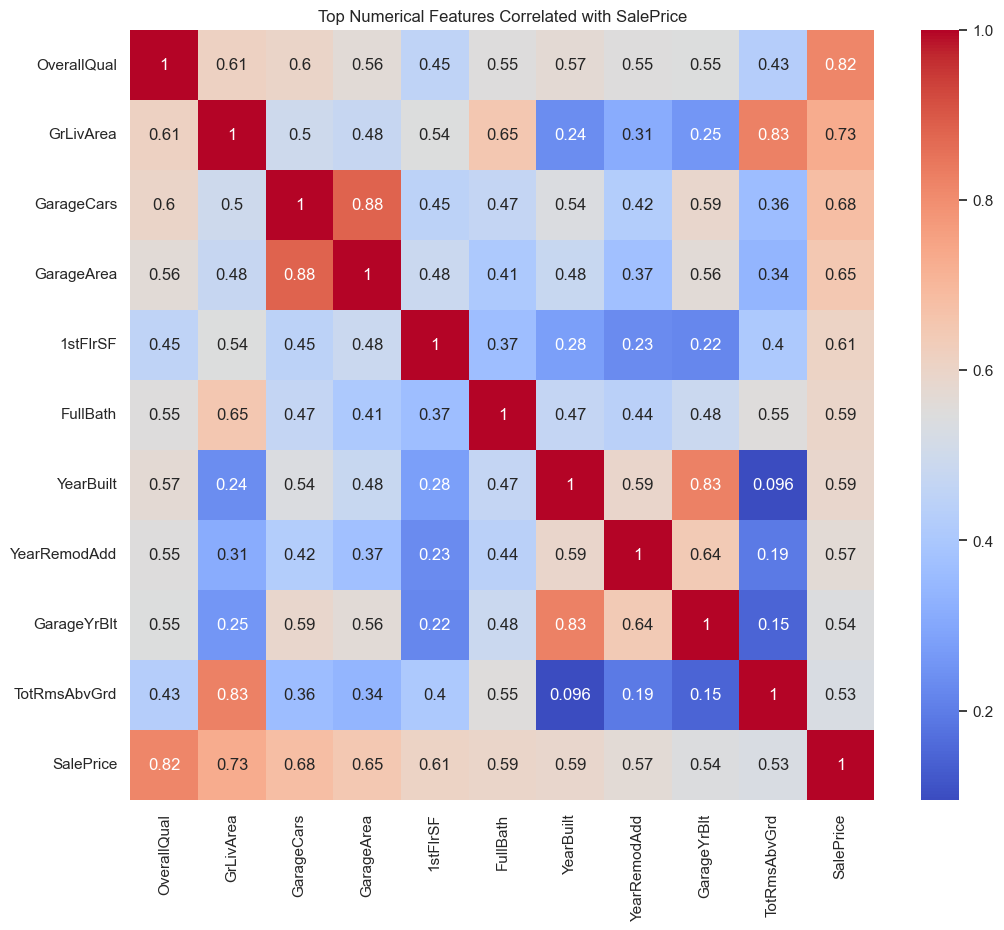

In [166]:
plt.figure(figsize=(12, 10))
top_features = top_corr_features.index[1:11]  # skip SalePrice itself
sns.heatmap(df[top_features.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Numerical Features Correlated with SalePrice")
plt.show()

This helps identify features like:

	• OverallQual

	• GrLivArea

	• GarageCars, GarageArea

	• TotalBsmtSF

	• 1stFlrSF

	• FullBath, etc.

These features likely show strong positive correlations — meaning as these increase, so does SalePrice.



## 8. How does location (e.g., neighborhood) affect prices?

We explore the effect of `Neighborhood` and other location-based features on house prices.


 Check average SalePrice by Neighborhood:

In [167]:
neigh_price = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
neigh_price

,mean,median,count
Neighborhood,,,
NoRidge,0.362581,0.360783,41
NridgHt,0.360780,0.362169,77
StoneBr,0.359675,0.358205,25
Timber,0.352624,0.351914,38
Veenker,0.351994,0.350397,11
Somerst,0.350473,0.351491,86
ClearCr,0.348639,0.347640,28
Crawfor,0.347504,0.347701,51
Blmngtn,0.346381,0.346097,17


 Visualize with boxplot:

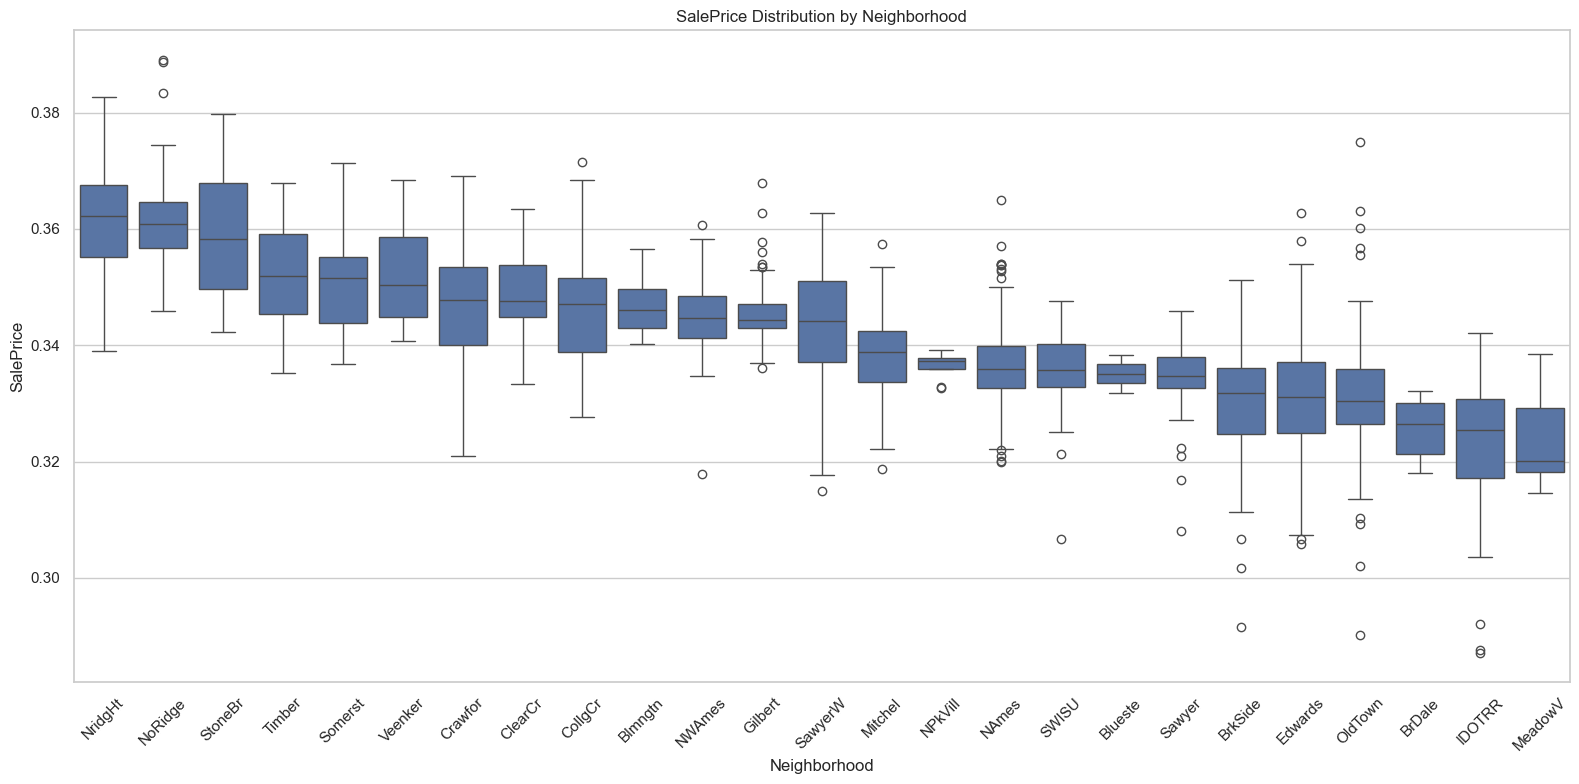

In [168]:
plt.figure(figsize=(16, 8))
order = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', order=order)
plt.xticks(rotation=45)
plt.title("SalePrice Distribution by Neighborhood")
plt.tight_layout()
plt.show()

Top 5 most expensive neighborhoods

In [ ]:
neigh_price.head(5)

,mean,median,count
Neighborhood,,,
NoRidge,0.362581,0.360783,41
NridgHt,0.360780,0.362169,77
StoneBr,0.359675,0.358205,25
Timber,0.352624,0.351914,38
Veenker,0.351994,0.350397,11


Bottom 5 least expensive neighborhoods


In [171]:
neigh_price.tail(5)

,mean,median,count
Neighborhood,,,
OldTown,0.330840,0.330390,113
BrkSide,0.330008,0.331849,58
BrDale,0.325654,0.326470,16
MeadowV,0.323115,0.320097,17
IDOTRR,0.322032,0.325492,37


standard deviation of house prices per neighborhood

In [172]:
neigh_stats = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'std', 'count']).sort_values(by='std', ascending=False)
neigh_stats.head(5)


,mean,median,std,count
Neighborhood,,,,
IDOTRR,0.322032,0.325492,0.013847,37
BrkSide,0.330008,0.331849,0.011795,58
StoneBr,0.359675,0.358205,0.011149,25
OldTown,0.330840,0.330390,0.010886,113
Crawfor,0.347504,0.347701,0.010586,51


visualization the distribution of sale prices using a boxplot

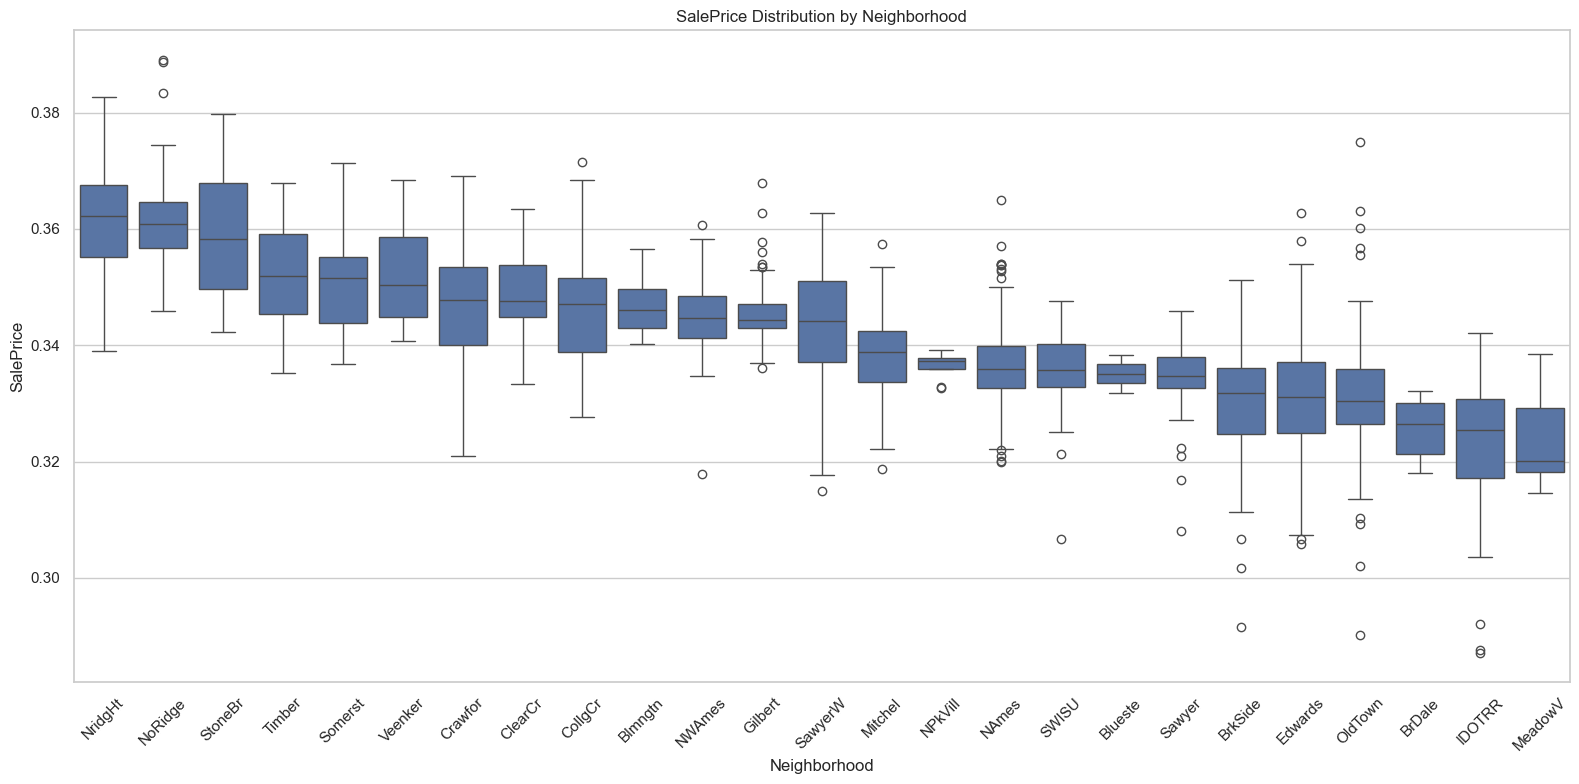

In [173]:
plt.figure(figsize=(16, 8))
order = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', order=order)
plt.xticks(rotation=45)
plt.title("SalePrice Distribution by Neighborhood")
plt.tight_layout()
plt.show()

 Insights 


## 9. Are there interactions or nonlinear effects?

We investigate whether certain features interact (e.g., `OverallQual` and `GrLivArea`) and if the relationship to `SalePrice` is nonlinear.


Numeric Feature Interactions

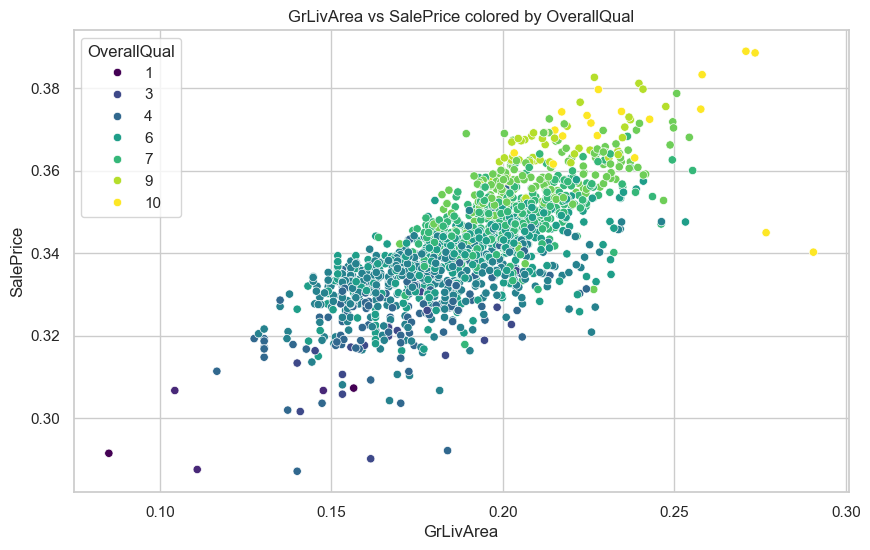

In [174]:
# Scatter: GrLivArea vs. SalePrice with color by OverallQual
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis')
plt.title('GrLivArea vs SalePrice colored by OverallQual')
plt.show()


Categorical Interactions (Boxplots)

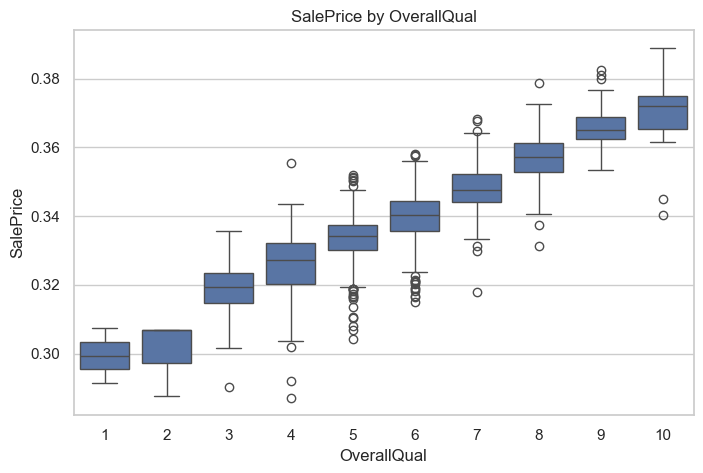

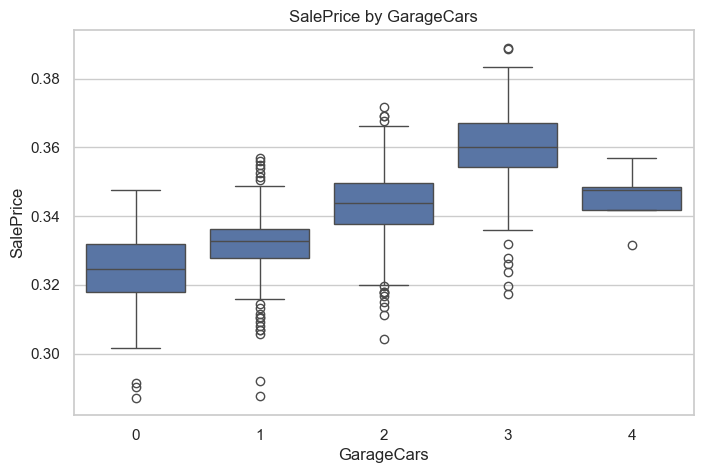

In [175]:
# Boxplot: OverallQual vs SalePrice
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.title("SalePrice by OverallQual")
plt.show()

# Boxplot: GarageCars vs SalePrice
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='GarageCars', y='SalePrice')
plt.title("SalePrice by GarageCars")
plt.show()


Feature Interactions via PairPlots


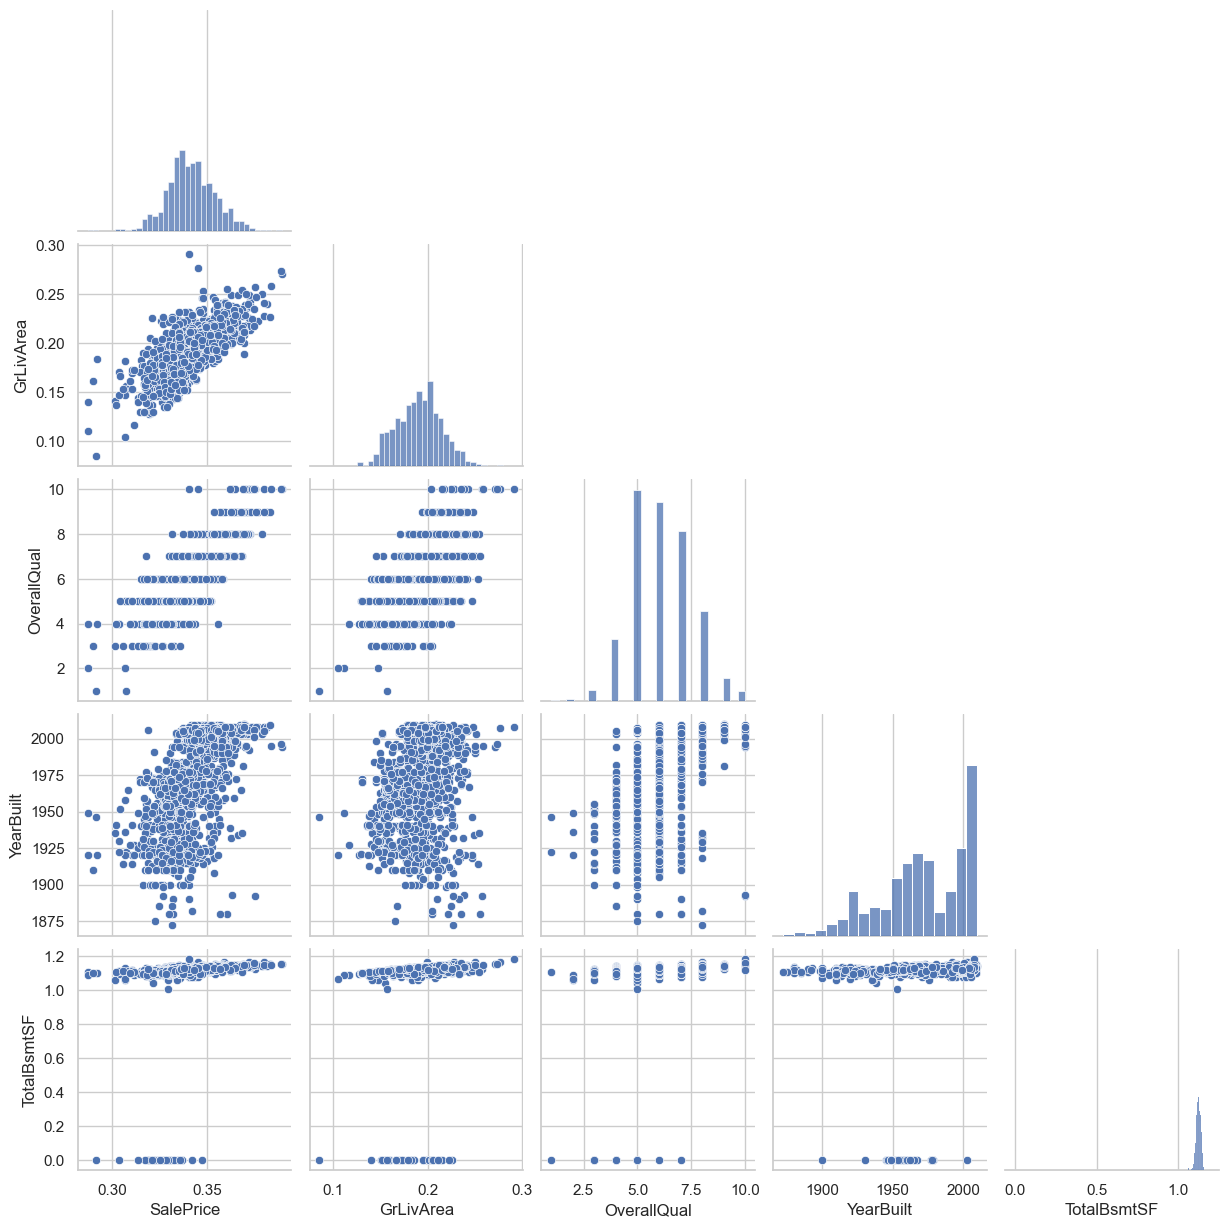

In [176]:
selected_feats = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']
sns.pairplot(df[selected_feats], corner=True)
plt.show()